<a href="https://colab.research.google.com/github/Flavio-Padilha/Analise_exploratoria/blob/main/Analise_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
#upload de arquivos
from google.colab import files
arq = files.upload()


Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [3]:
#Criar DataFrame
df = pd.read_excel("AdventureWorks.xlsx")

In [4]:
#Exibir parte superior
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [5]:
#Ver tamanho do arquivo
df.shape

(904, 16)

In [6]:
#verificar tipo de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [7]:
#qual foi a receita total?
round(df["Valor Venda"].sum(), 2)

5984606.14

In [8]:
#Qual o custo total?
df["Custo"] = df["Custo Unitário"].mul(df["Quantidade"]) #Criada uma nova coluna com o custo

In [9]:
#Verificar colunas
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [10]:
#calcular custo total
round(df["Custo"].sum(),2)

2486783.05

In [11]:
#Criar uma coluna com o lucro (Receita - custo)
df["Lucro"] = df["Valor Venda"] - df["Custo"]

In [12]:
#verificar coluna
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [13]:
#lucro total
round(df["Lucro"].sum(), 2)

3497823.09

In [14]:
#Verificar tempo de envio.
df["Tempo de envio"] = df["Data Envio"] - df["Data Venda"]

In [15]:
#verificar coluna criada
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo de envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


**Para saber a média de dias para envio, tem que transformar os dados da coluna "Tempor de envio" em dias**

In [16]:
#transformar dados em dias, sem a palavra "days"
df["Tempo de envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days

In [17]:
#Verificar a mudança dos dados
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo de envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [18]:
#verificar o tipo de dado da nova coluna
df["Tempo de envio"].dtype

dtype('int64')

In [19]:
#verificar a média de envio por marca
df.groupby("Marca")["Tempo de envio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo de envio, dtype: float64

In [20]:
#verificar valores ausentes
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo de envio    0
dtype: int64

**Verificar lucro por ano e marca**

In [23]:
#agrupar por marca e ano e verifica o lucro
df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum()

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: Lucro, dtype: float64

In [24]:
pd.options.display.float_format= '{:20,.2f}'.format

In [22]:
#resetar o index. Bom usar pra fazer um novo arquivo
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,3.066412e+05
1,2008,Contoso,5.641600e+04
2,2008,Fabrikam,1.557021e+06
3,2009,Adventure Works,4.053951e+05
4,2009,Contoso,1.382590e+05
5,2009,Fabrikam,1.034091e+06


In [24]:
#Qual a quantidade de produtos vendidos?
df.groupby("Produto")[ "Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

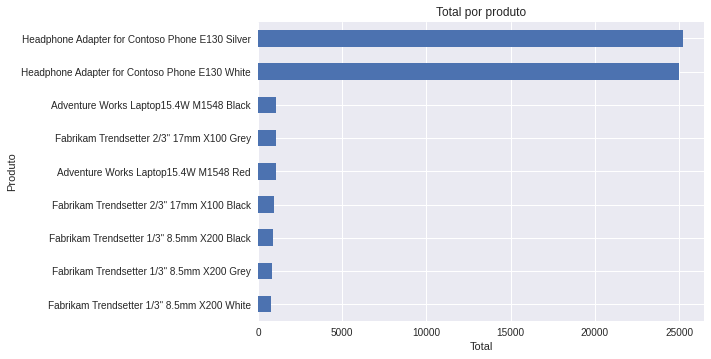

In [25]:
#Gráfico total de produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title = "Total por produto")
plt.xlabel("Total")
plt.ylabel("Produto");

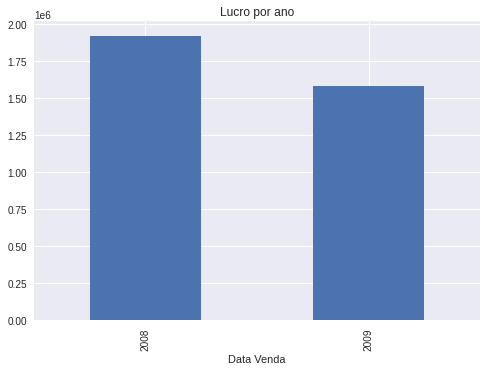

In [26]:
#Gráfico do lucro por ano
df.groupby([df["Data Venda"].dt.year])["Lucro"].sum().plot.bar(title = "Lucro por ano")


In [27]:
df.groupby([df["Data Venda"].dt.year])["Lucro"].sum()

Data Venda
2008    1.920078e+06
2009    1.577745e+06
Name: Lucro, dtype: float64

In [28]:
#Selecionar vendas de 2009
df_2009 = df[df["Data Venda"].dt.year == 2009]
df_2009.sample(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo de envio
380,2009-12-27,2010-01-04,199,1202,19034,200912274CS950,330.66,998.0,14,2794.4,11177.6,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,4629.24,6548.36,8


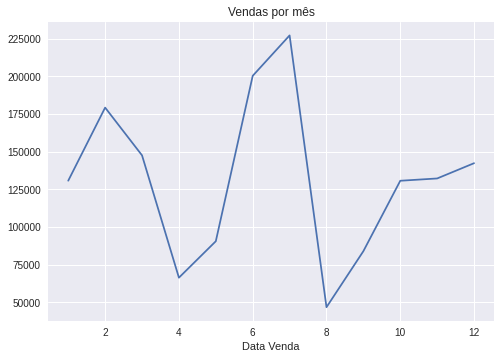

In [29]:
#Criar gráfico com os dados do mês de 2009
df_2009.groupby(df_2009["Data Venda"].dt.month)["Lucro"].sum().plot(title="Vendas por mês")

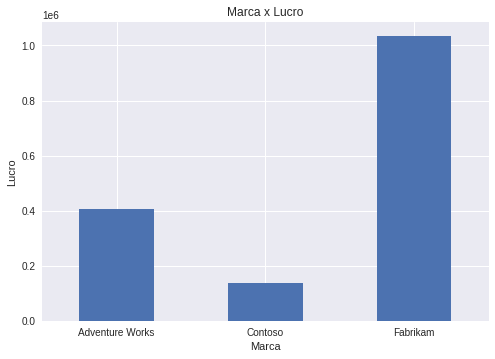

In [30]:
#Criar gráfico com os lucros por marca
df_2009.groupby("Marca")["Lucro"].sum().plot.bar(title="Marca x Lucro")
plt.xticks(rotation='horizontal');
plt.xlabel('Marca')
plt.ylabel('Lucro');

Text(0, 0.5, 'Classes')

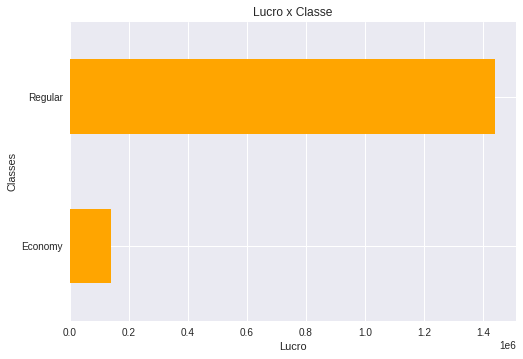

In [31]:
#Gráfico do lucro por classe
df_2009.groupby(df_2009["Classe"])["Lucro"].sum().plot.barh(title="Lucro x Classe", color = "orange")
plt.xlabel('Lucro')
plt.ylabel('Classes')

In [32]:
#Criar algumas estatísticas
df["Tempo de envio"].describe()

count    904.000000
mean       8.543142
std        3.056920
min        4.000000
25%        6.000000
50%        9.000000
75%       11.000000
max       20.000000
Name: Tempo de envio, dtype: float64

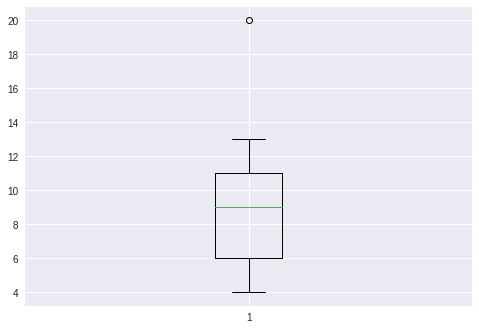

In [33]:
#Gráfico de boxplot
plt.boxplot(df["Tempo de envio"]);

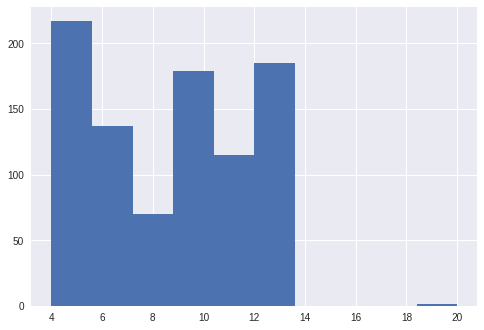

In [34]:
#Histograma
plt.hist(df["Tempo de envio"]);

In [35]:
#Salvando arquivo em csv
df.to_csv("df_vendas_novo.csv", index = False)